In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import networkx as nx
import math

df = pd.read_csv("/kaggle/input/cat-breeds-dataset/data/cats.csv")
df.head()

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [ ]:
# circular_ladder_graph
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.circular_ladder_graph.html

In [6]:
# Ideas ready

p = df.groupby(['age','gender','size','coat','breed'])['id'].sum().reset_index()
p = p.drop('id',axis=1)
p = p.drop_duplicates()
p = p.dropna()
p

,age,gender,size,coat,breed
0,Adult,Female,Extra Large,Long,Birman
1,Adult,Female,Extra Large,Long,Calico
2,Adult,Female,Extra Large,Long,Dilute Calico
3,Adult,Female,Extra Large,Long,Domestic Long Hair
4,Adult,Female,Extra Large,Long,Himalayan
...,...,...,...,...,...
2474,Young,Male,Small,Short,Tiger
2475,Young,Male,Small,Short,Tonkinese
2476,Young,Male,Small,Short,Turkish Angora
2477,Young,Male,Small,Short,Turkish Van


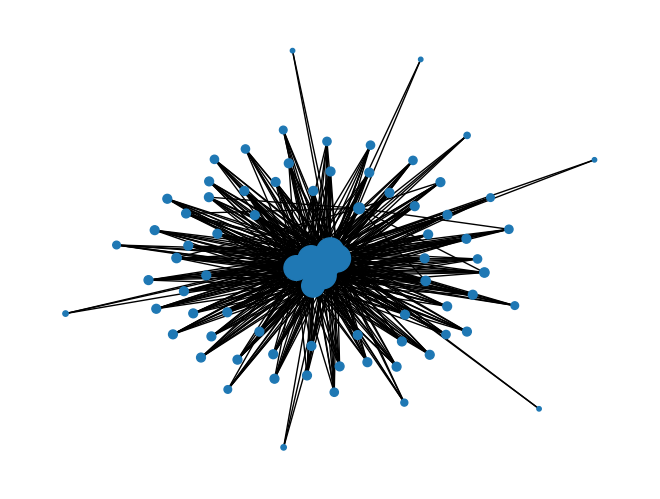

In [7]:
# Create nodes
G = nx.Graph()

for x in range(p['age'].nunique()):
    G.add_node(p['age'].unique()[x])
for x in range(p['gender'].nunique()):
    G.add_node(p['gender'].unique()[x])
for x in range(p['size'].nunique()):
    G.add_node(p['size'].unique()[x])
for x in range(p['coat'].nunique()):
    G.add_node(p['coat'].unique()[x])
for x in range(p['breed'].nunique()):
    G.add_node(p['breed'].unique()[x])
    
# Add edges
for x in range(len(p['age'])):
    G.add_edge(p['age'][x],p['gender'][x])
    #G.add_edge(p['age'][x],p['size'][x])
    #G.add_edge(p['age'][x],p['coat'][x])
    #G.add_edge(p['age'][x],p['breed'][x]) #too messy
    
    G.add_edge(p['gender'][x],p['size'][x])
    G.add_edge(p['gender'][x],p['coat'][x])
    G.add_edge(p['gender'][x],p['breed'][x])
    
    G.add_edge(p['size'][x],p['coat'][x])
    G.add_edge(p['size'][x],p['breed'][x])
    
    G.add_edge(p['coat'][x],p['breed'][x])

node_adj = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adj.append(len(adjacencies[1])*5)
    
nx.draw(G, node_size = node_adj)

In [ ]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#draw

# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_circular.html

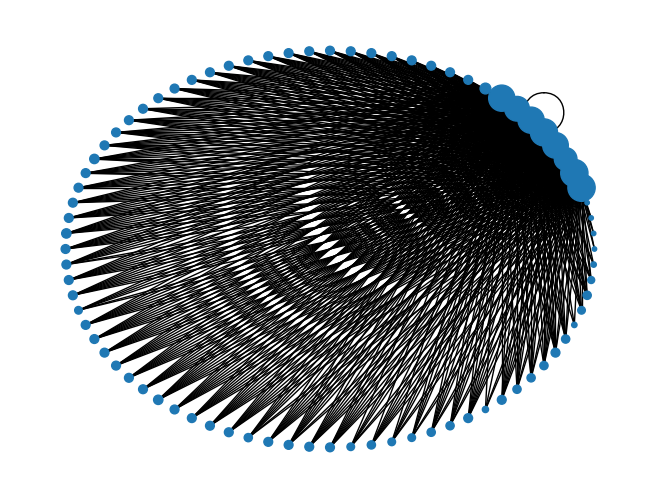

In [9]:
#G = nx.complete_graph(5)

pos = nx.circular_layout(G)
## THIS LOOKS SO COOL
nx.draw(G, pos=pos, node_size = node_adj)  # Draw the original graph

# Draw a subgraph, reusing the same node positions

#nx.draw(G.subgraph([0, 1, 2]), pos=pos, node_color="red")

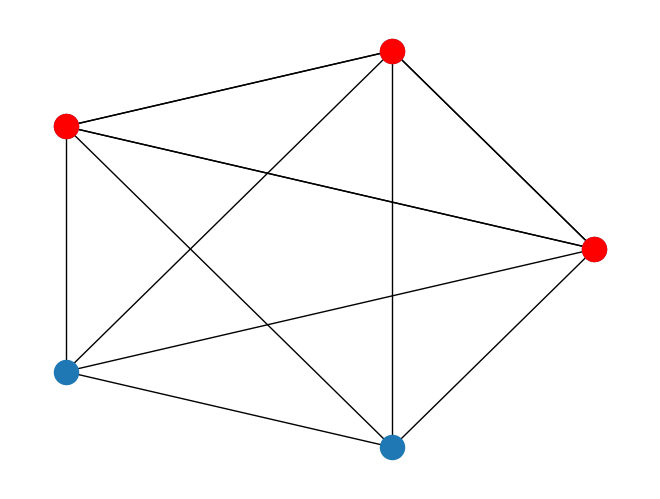

In [10]:
# Credit to https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_circular.html
Z = nx.complete_graph(5)

posZ = nx.circular_layout(Z)
## THIS LOOKS SO COOL
nx.draw(Z, pos=posZ)  # Draw the original graph

# Draw a subgraph, reusing the same node positions

nx.draw(Z.subgraph([0, 1, 2]), pos=posZ, node_color="red")

In [10]:
F = nx.Graph()


for x in range(p['age'].nunique()):
    F.add_node(p['age'].unique()[x], pos = pos[p['age'].unique()[x]])
    
for x in range(p['gender'].nunique()):
    F.add_node(p['gender'].unique()[x], pos = pos[p['gender'].unique()[x]])
    
for x in range(p['size'].nunique()):
    F.add_node(p['size'].unique()[x], pos = pos[p['size'].unique()[x]])
    
for x in range(p['coat'].nunique()):
    F.add_node(p['coat'].unique()[x], pos = pos[p['coat'].unique()[x]])
    
for x in range(p['breed'].nunique()):
    F.add_node(p['breed'].unique()[x], pos = pos[p['breed'].unique()[x]])
    
    
# Add edges
for x in range(len(p['age'])):
    F.add_edge(p['age'][x],p['gender'][x])
    F.add_edge(p['gender'][x],p['size'][x])
    F.add_edge(p['gender'][x],p['coat'][x])
    F.add_edge(p['gender'][x],p['breed'][x])
    
    F.add_edge(p['size'][x],p['coat'][x])
    F.add_edge(p['size'][x],p['breed'][x])
    
    F.add_edge(p['coat'][x],p['breed'][x])

In [17]:
# Credit: https://plotly.com/python/network-graphs/
edge_x = []
edge_y = []
for edge in F.edges():
    x0, y0 = F.nodes[edge[0]]['pos']
    x1, y1 = F.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in F.nodes():
    x, y = F.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

    
node_adjacencies = []
node_adjacencies_morphed = []
node_text = []
for node, adjacencies in enumerate(F.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0])+' # of connections: '+str(len(adjacencies[1])))
    node_adjacencies_morphed.append(5*math.log2(len(adjacencies[1]))+8)
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_adjacencies_morphed,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace,node_trace],
             layout=go.Layout(
                title='Rating Popularity',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

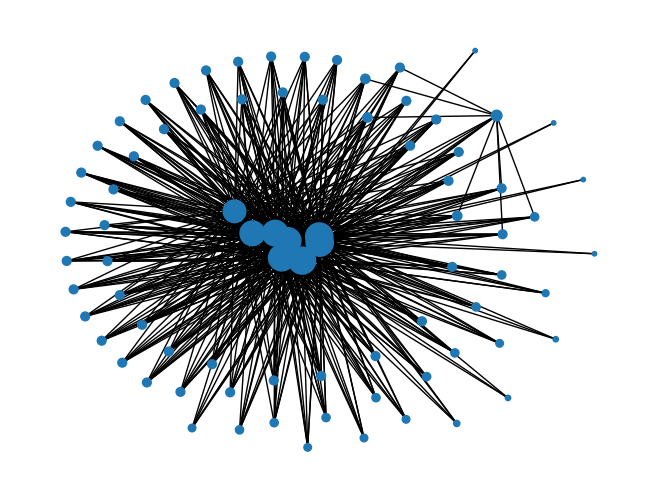

In [11]:
# Check other types to see which works best, the one above doesn't look promising in this case

pos = nx.kamada_kawai_layout(G)
## THIS LOOKS SO COOL
nx.draw(G, pos=pos, node_size = node_adj)  # Draw the original graph

In [12]:
F = nx.Graph()



    
for x in range(p['size'].nunique()):
    F.add_node(p['size'].unique()[x], pos = pos[p['size'].unique()[x]])
    
for x in range(p['coat'].nunique()):
    F.add_node(p['coat'].unique()[x], pos = pos[p['coat'].unique()[x]])
    
for x in range(p['breed'].nunique()):
    F.add_node(p['breed'].unique()[x], pos = pos[p['breed'].unique()[x]])
    
    
# Add edges
for x in range(len(p['age'])):
    
    
    F.add_edge(p['size'][x],p['coat'][x])
    F.add_edge(p['size'][x],p['breed'][x])
    
    F.add_edge(p['coat'][x],p['breed'][x])

In [17]:
# Credit: https://plotly.com/python/network-graphs/
edge_x = []
edge_y = []
for edge in F.edges():
    x0, y0 = F.nodes[edge[0]]['pos']
    x1, y1 = F.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in F.nodes():
    x, y = F.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

    
node_adjacencies = []
node_adjacencies_morphed = []
node_text = []
node_text_morphed = []
for node, adjacencies in enumerate(F.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0])+' # of connections: '+str(len(adjacencies[1])))
    node_adjacencies_morphed.append(5*math.log2(len(adjacencies[1]))+8)
    if len(adjacencies[1]) > 19:
        node_text_morphed.append(str(adjacencies[0]))
    else:
        node_text_morphed.append("")
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_adjacencies_morphed,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_trace.marker.color = node_adjacencies
node_trace.text = node_text

node_trace2 = go.Scatter(
    x=node_x, y=node_y,
    mode='text',
    text=node_text_morphed,
    textfont=dict(
        color='black',
        family='Arial',
        size=14,
    )
)

fig = go.Figure(data=[edge_trace,node_trace,node_trace2],
             layout=go.Layout(
                title='Cat Species Size',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
# Could be the one, just need to check a few others

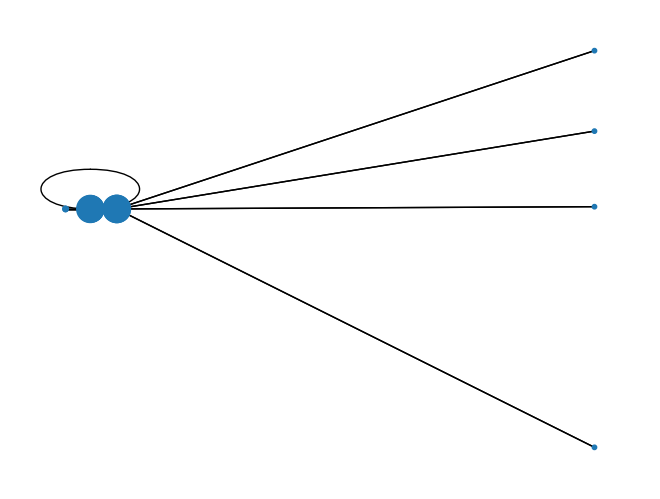

In [29]:
#nx.draw_planar(G) # Errors, G isn't planar
pos = nx.spectral_layout(G)
nx.draw_spectral(G, node_size = node_adj) # Interesting, could be useful

In [30]:
F = nx.Graph()



    
for x in range(p['size'].nunique()):
    F.add_node(p['size'].unique()[x], pos = pos[p['size'].unique()[x]])
    
for x in range(p['coat'].nunique()):
    F.add_node(p['coat'].unique()[x], pos = pos[p['coat'].unique()[x]])
    
for x in range(p['breed'].nunique()):
    F.add_node(p['breed'].unique()[x], pos = pos[p['breed'].unique()[x]])
    
    
# Add edges
for x in range(len(p['age'])):
    
    F.add_edge(p['size'][x],p['coat'][x])
    F.add_edge(p['size'][x],p['breed'][x])
    
    F.add_edge(p['coat'][x],p['breed'][x])

In [31]:
# Credit: https://plotly.com/python/network-graphs/
edge_x = []
edge_y = []
for edge in F.edges():
    x0, y0 = F.nodes[edge[0]]['pos']
    x1, y1 = F.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in F.nodes():
    x, y = F.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

    
node_adjacencies = []
node_adjacencies_morphed = []
node_text = []
for node, adjacencies in enumerate(F.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0])+' # of connections: '+str(len(adjacencies[1])))
    node_adjacencies_morphed.append(5*math.log2(len(adjacencies[1]))+8)
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_adjacencies_morphed,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace,node_trace],
             layout=go.Layout(
                title='Rating Popularity',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
# Good for picking out certain nodes, but doesn't do much